# Setup

# Import modules

In [1]:
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import global variables and plotting functions

In [2]:
sys.path.insert(0, '..')

# global vars
from util_scripts.plotting_fcts_and_vars import years, growth_boroughs, boroughs, west_boroughs, columns, types

# plotting per borrough
from util_scripts.plotting_fcts_and_vars import plot_boroughs, plot_all_boroughs

# plotting stations data
from util_scripts.plotting_fcts_and_vars import plot_stations, plot_stations_percentage_changes

# plotting global vars
from util_scripts.plotting_fcts_and_vars import FIGSIZE, YEAR_XLABEL

sys.path.insert(0, './notebooks')

# Underground activity

In [3]:
underground = pd.read_csv('../data/london_underground_activity.csv')
underground.isna().sum()

year                     0
nlc                      0
station                  0
area                     7
weekday_entry            0
weekday_exit             0
saturday_entry           0
saturday_exit            0
sunday_entry             0
sunday_exit              0
annual_entry_and_exit    0
dtype: int64

We don't use Area from this dataset, so can just remove it

In [4]:
# we don't use Area from this dataset
underground.dropna(axis=1, inplace=True)
underground.head()

,year,nlc,station,weekday_entry,weekday_exit,saturday_entry,saturday_exit,sunday_entry,sunday_exit,annual_entry_and_exit
0,2007,500,Acton Town,9205,8899.0,6722,6320,4427,4304,5.77
1,2007,502,Aldgate,9887,10397.0,2191,2587,1484,1772,5.57
2,2007,503,Aldgate East,12820,12271.0,7040,6220,5505,5000,7.66
3,2007,505,Alperton,4611,4719.0,3354,3450,2433,2503,3.01
4,2007,506,Amersham,4182,3938.0,1709,1585,1004,957,2.34


# Stations in the growth boroughs

In [5]:
info = pd.read_csv('../data/london_underground_station_info.csv')
info_growth_boroughs = info[info['local_authority'].isin(growth_boroughs)]
info_growth_boroughs.head()

,station,line,local_authority,zone,opened
2,Aldgate East,Hammersmith & City[d],Tower Hamlets,1,1884-10-06
13,Barking,District[j],Barking and Dagenham,4,1902-06-02
17,Becontree,District,Barking and Dagenham,5,1932-07-18
20,Bethnal Green,Central,Tower Hamlets,2,1946-12-04
22,Blackhorse Road,Victoria,Waltham Forest,3,1968-09-01


In [6]:
growth_stations = list(info_growth_boroughs['station'])
len(growth_stations)

26

## Checking stations

In [7]:
stations = set(info['station'].unique())
len(stations)

267

In [8]:
stations_with_data = set(underground['station'].unique())
len(stations_with_data)

275

In [9]:
len(stations.intersection(stations_with_data))

260

In [10]:
stations.difference(stations_with_data)

{'Bank',
 'Edgware Road',
 'Hammersmith',
 'Heathrow Terminals 1; 2; 3',
 'Monument',
 "Shepherd's Bush",
 "Shepherd's Bush Market"}

In [11]:
stations_with_data.difference(stations)

{'Bank & Monument',
 'Edgware Road (Bak)',
 'Edgware Road (Cir)',
 'Hammersmith (Dis)',
 'Hammersmith (H&C)',
 'Heathrow Terminals 123',
 'New Cross',
 'New Cross Gate',
 'Rotherhithe',
 'Shadwell',
 "Shepherd's Bush (Cen)",
 "Shepherd's Bush (H&C)",
 'Shoreditch',
 'Surrey Quays',
 'Wapping'}

## Stratford vs all other east boroughs

### Annual

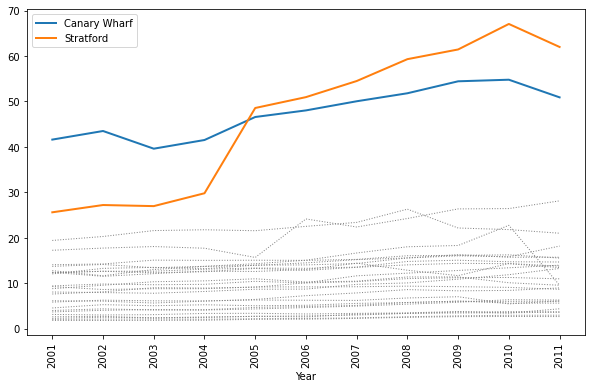

In [12]:
highlight_stations = ['Stratford', 'Canary Wharf']
plot_stations(underground, "annual_entry_and_exit", highlight_stations, growth_stations)

### Weekday

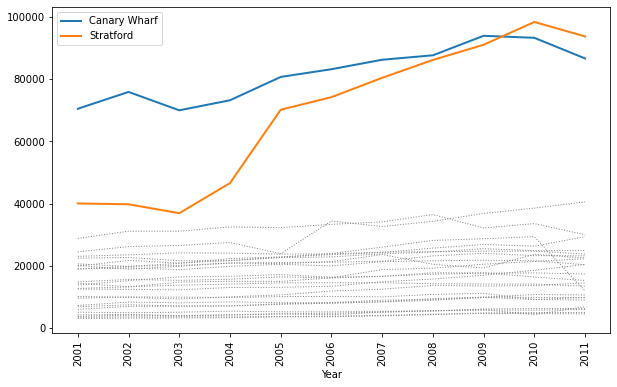

In [13]:
highlight_stations = ['Stratford', 'Canary Wharf']
plot_stations(underground, "weekday_entry", highlight_stations, growth_stations)

### Saturday

In [14]:
highlight_stations = ["Stratford"]

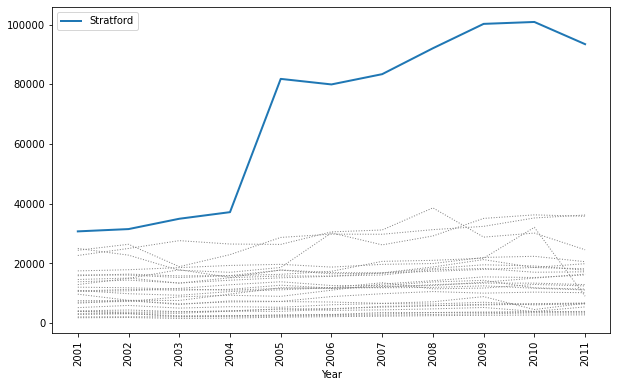

In [15]:
plot_stations(underground, "saturday_entry", highlight_stations, growth_stations)

### Sunday

In [16]:
highlight_stations = ["Stratford"]

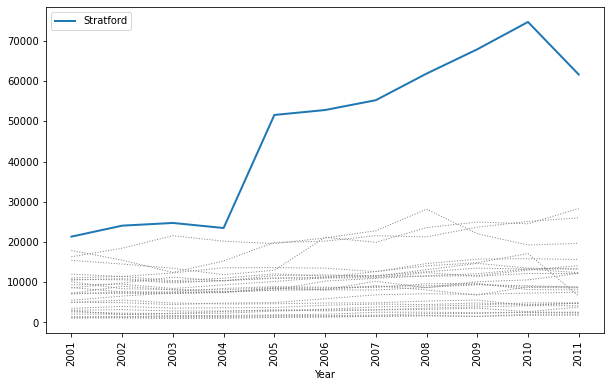

In [17]:
plot_stations(underground, "sunday_entry", highlight_stations, growth_stations)

# Stations in the east boroughs vs rest 

## Absolute value 

In [18]:
year_2007 = underground[underground['year'] == 2007]

big_stations_data = year_2007[year_2007['saturday_entry'] >= 80000]
big_stations = list(big_stations_data['station'].values)
big_stations

["King's Cross St. Pancras", 'Oxford Circus', 'Victoria']

In [19]:
highlight_stations = big_stations + ['Stratford']

### Weekday

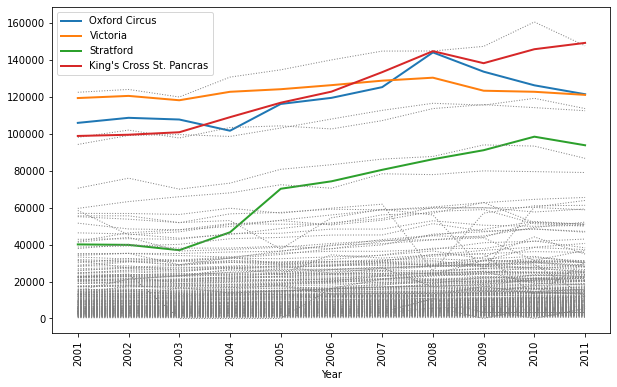

In [20]:
plot_stations(underground, "weekday_entry", highlight_stations, stations)

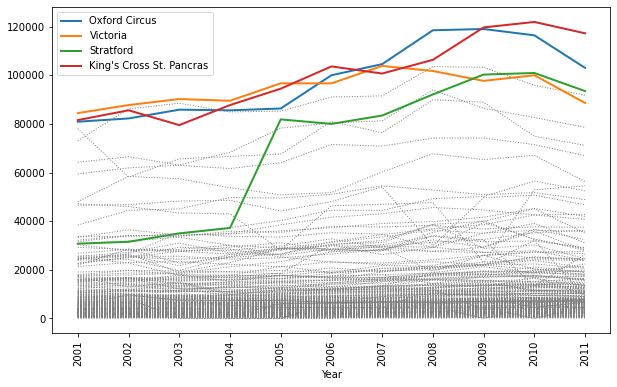

In [21]:
plot_stations(underground, "saturday_entry", highlight_stations, stations)

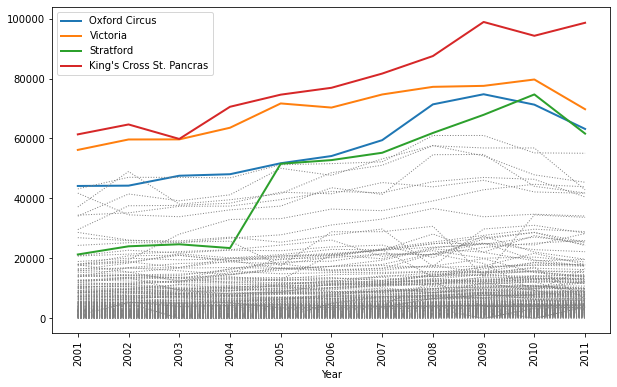

In [22]:
plot_stations(underground, "sunday_entry", highlight_stations, stations)

## Percent change (baseline 2007)


In [23]:
underground

,year,nlc,station,weekday_entry,weekday_exit,saturday_entry,saturday_exit,sunday_entry,sunday_exit,annual_entry_and_exit
0,2007,500,Acton Town,9205,8899.0,6722,6320,4427,4304,5.77
1,2007,502,Aldgate,9887,10397.0,2191,2587,1484,1772,5.57
2,2007,503,Aldgate East,12820,12271.0,7040,6220,5505,5000,7.66
3,2007,505,Alperton,4611,4719.0,3354,3450,2433,2503,3.01
4,2007,506,Amersham,4182,3938.0,1709,1585,1004,957,2.34
...,...,...,...,...,...,...,...,...,...,...
2948,2017,768,Wimbledon Park,3583,3301.0,2648,2235,1605,1600,2.18
2949,2017,770,Wood Green,20042,18949.0,15815,16020,11793,11415,12.89
2950,2017,599,Wood Lane,6242,6631.0,4516,4294,2267,2494,4.00
2951,2017,769,Woodford,9442,9537.0,6937,6301,4140,4142,5.98


In [24]:
station_year_numeric = underground.groupby(['station','year']).sum()
station_year_numeric

nlc  weekday_entry  weekday_exit  saturday_entry  \
station       year                                                     
Acton Town    2007  500           9205        8899.0            6722   
              2008  500           9285        9028.0            6574   
              2009  500           8601        8595.0            5816   
              2010  500           8669        8403.0            5912   
              2011  500           8702        8392.0            6326   
...                 ...            ...           ...             ...   
Woodside Park 2013  771           4482        4299.0            2191   
              2014  771           4328        4143.0            2763   
              2015  771           4795        4327.0            2799   
              2016  771           4842        4382.0            2922   
              2017  771           5311        6089.0            2997   

                    saturday_exit  sunday_entry  sunday_exit  \
station       year                                             
Acton Town    2007           6320          4427         4304   
              2008           6295          4358         4361   
              2009           5803          4231         4324   
              2010           5877          4184         4224   
              2011           5976          4216         4223   
...                           ...           ...          ...   
Woodside Park 2013           2246          1454         1618   
              2014           2839          1705         1896   
              2015           2877          1717         1906   
              2016           3033          1810         2031   
              2017           3760          2246         2967   

                    annual_entry_and_exit  
station       year                         
Acton Town    2007               5.770000  
              2008               5.820000  
              2009               5.460000  
              2010               5.430000  
              2011               5.460000  
...                                   ...  
Woodside Park 2013               2.630000  
              2014               2.650000  
              2015               2.816775  
              2016               2.870000  
              2017               3.540000  

[2953 rows x 8 columns]

In [25]:
station_year_numeric.shape[0]

2953

In [26]:
print(len(stations_with_data))

275


In [27]:
actual_stations = list(set(underground[underground['year'] == 2008]['station'].values))

In [28]:
station_year_numeric.loc['Stratford']

,nlc,weekday_entry,weekday_exit,saturday_entry,saturday_exit,sunday_entry,sunday_exit,annual_entry_and_exit
year,,,,,,,,
2007,719,40084,38540.0,30755,31154,21334,21310,25.63000
2008,719,39831,43902.0,31524,30151,24060,24067,27.23000
2009,719,36963,43449.0,34983,35383,24733,25885,26.99000
2010,719,46643,45812.0,37198,34589,23475,22210,29.82000
2011,719,70198,66657.0,81848,75104,51574,46485,48.57000
2012,719,74238,71501.0,79991,75360,52801,49109,50.96000
2013,719,80455,76757.0,83432,78651,55245,51541,54.50000
2014,719,86183,83030.0,92110,88485,61847,58602,59.31000
2015,719,91067,82048.0,100280,92440,67894,61311,61.44263


In [29]:
station_to_percentage_changes_2007 = {}
bad_stations = []

for station in actual_stations:
    if station_year_numeric.loc[station].shape[0] < 11:
        print(station)
        bad_stations.append(station)
        continue
    multipliers_2007 = station_year_numeric.loc[station].div(station_year_numeric.loc[(station, 2007)])
    percentage_changes_2007 = multipliers_2007.sub(1)    
    station_to_percentage_changes_2007[station] = percentage_changes_2007
    
    
for st in bad_stations:
    actual_stations.remove(st)
    
print(len(actual_stations))
len(list(station_to_percentage_changes_2007.keys()))

Wood Lane
Heathrow Terminal 5
266


266

### Weekday

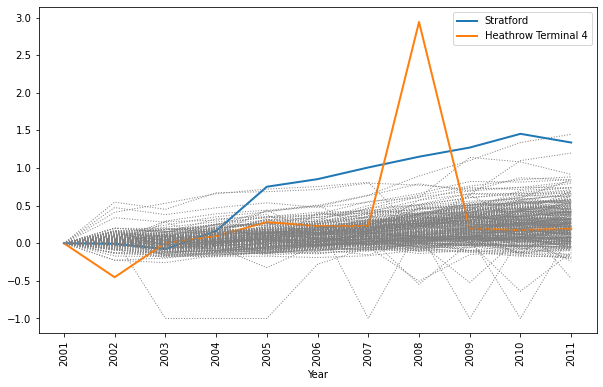

In [30]:
# Heathrow terminal 4 was renovated in 2014
plot_stations_percentage_changes(station_to_percentage_changes_2007, 'weekday_entry', ['Stratford','Heathrow Terminal 4'], actual_stations )

In [31]:
for station in station_to_percentage_changes_2007:
    if station_to_percentage_changes_2007[station].loc[2014, 'weekday_entry'] > 2:
        print(station)

Heathrow Terminal 4


### Saturday

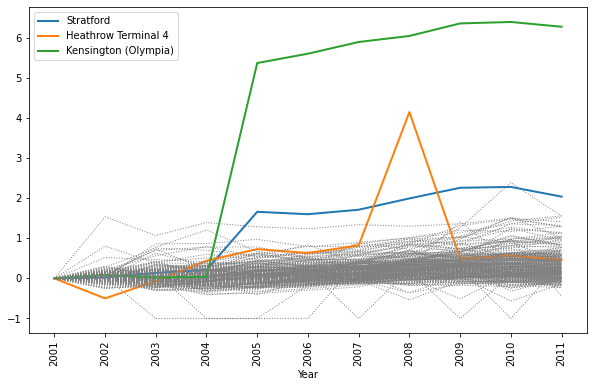

In [32]:
# Kensington (Olympia) was built in 2010 (August)
plot_stations_percentage_changes(station_to_percentage_changes_2007, 'saturday_entry', ['Stratford','Heathrow Terminal 4', 'Kensington (Olympia)'], actual_stations )

In [33]:
for station in station_to_percentage_changes_2007:
    if station_to_percentage_changes_2007[station].loc[2014, 'saturday_entry'] > 3:
        print(station)

Heathrow Terminal 4
Kensington (Olympia)


### Sunday

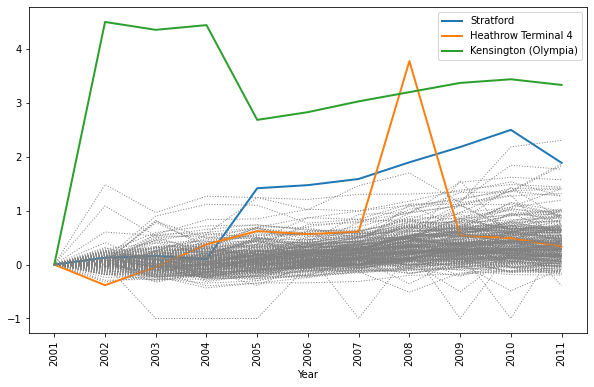

In [34]:
# Kensington (Olympia) was built in 2010 (August)
plot_stations_percentage_changes(station_to_percentage_changes_2007, 'sunday_entry', ['Stratford','Heathrow Terminal 4', 'Kensington (Olympia)'], actual_stations )

In [35]:
for station in station_to_percentage_changes_2007:
    if station_to_percentage_changes_2007[station].loc[2014, 'sunday_entry'] > 3:
        print(station)

Heathrow Terminal 4
Kensington (Olympia)
